In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pytrends pandas matplotlib


In [3]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")   # clean and professional


In [4]:
pytrends = TrendReq(hl='en-US', tz=330)


In [5]:
keywords = ["ChatGPT", "Google Search", "Bard AI", "GPT-4"]
pytrends.build_payload(keywords, timeframe="2020-01-01 2025-01-01")


In [6]:
iot = pytrends.interest_over_time()

iot.drop(columns=['isPartial'], inplace=True)
iot.tail()


,ChatGPT,Google Search,Bard AI,GPT-4
date,,,,
2024-12-01,94,5,0,0
2024-12-08,100,5,0,0
2024-12-15,84,5,0,0
2024-12-22,67,4,0,0
2024-12-29,63,4,0,0


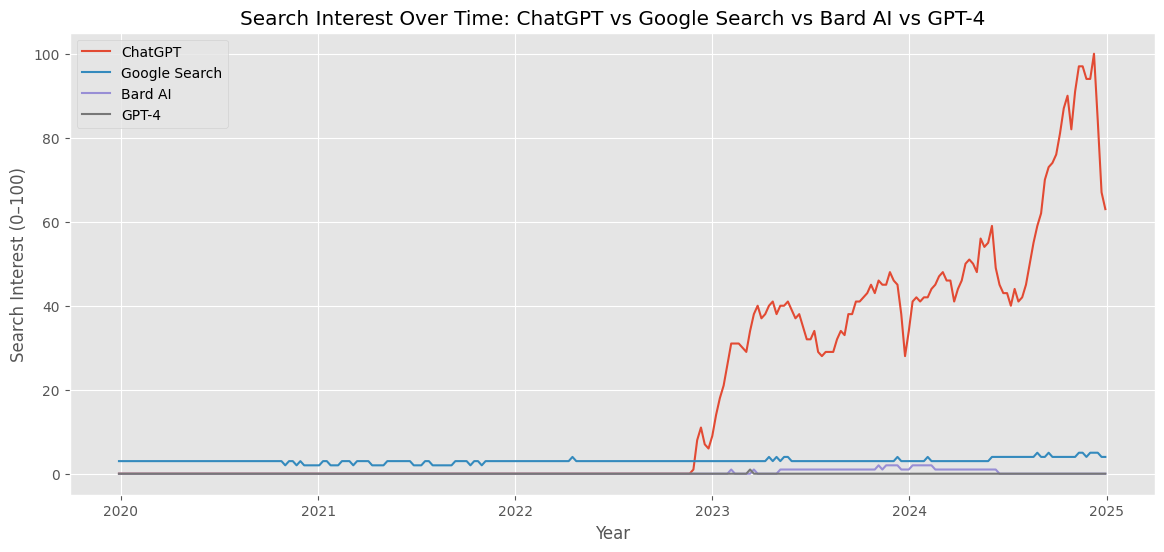

In [7]:
plt.figure(figsize=(14,6))
for col in iot.columns:
    plt.plot(iot.index, iot[col], label=col)

plt.title("Search Interest Over Time: ChatGPT vs Google Search vs Bard AI vs GPT-4")
plt.xlabel("Year")
plt.ylabel("Search Interest (0–100)")
plt.legend()
plt.show()


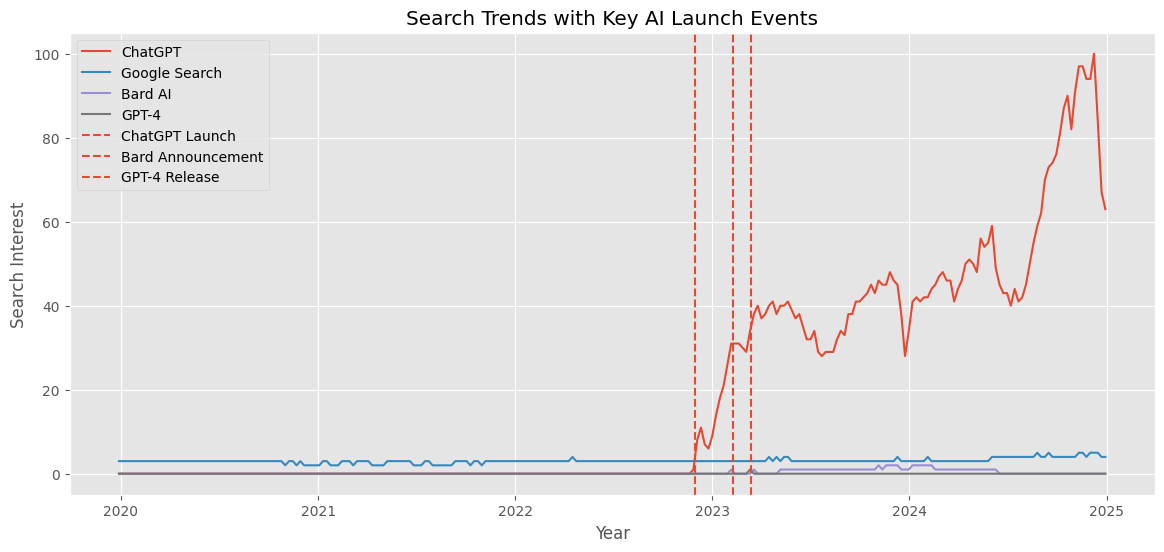

In [8]:
events = {
    "ChatGPT Launch": "2022-11-30",
    "Bard Announcement": "2023-02-08",
    "GPT-4 Release": "2023-03-14"
}

plt.figure(figsize=(14,6))

# main plot
for col in iot.columns:
    plt.plot(iot.index, iot[col], label=col)

# event vertical lines
for name, date in events.items():
    plt.axvline(pd.to_datetime(date), linestyle="--", label=name)

plt.title("Search Trends with Key AI Launch Events")
plt.xlabel("Year")
plt.ylabel("Search Interest")
plt.legend()
plt.show()


In [9]:
region_data = pytrends.interest_by_region(resolution="country")
region_data.head()


,ChatGPT,Google Search,Bard AI,GPT-4
geoName,,,,
Afghanistan,0,0,0,0
Albania,0,0,0,0
Algeria,91,6,3,0
American Samoa,0,0,0,0
Andorra,0,0,0,0


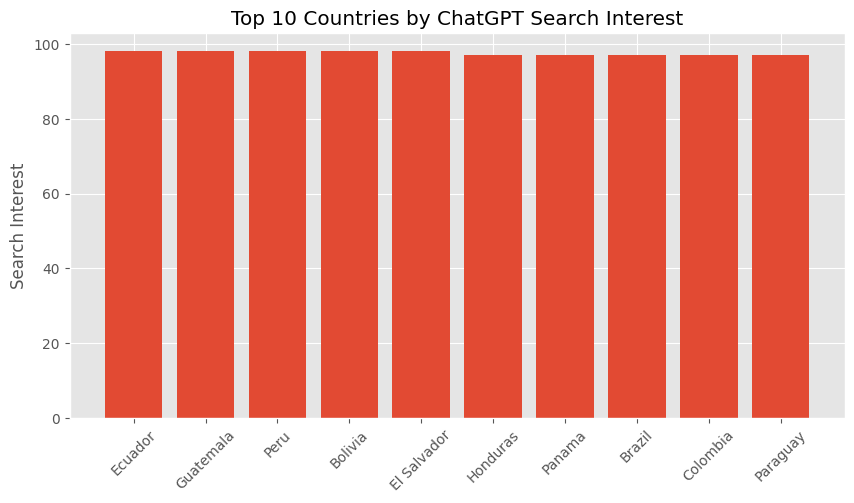

In [10]:
top_chatgpt = region_data.sort_values("ChatGPT", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_chatgpt.index, top_chatgpt["ChatGPT"])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by ChatGPT Search Interest")
plt.ylabel("Search Interest")
plt.show()
